# Mazapan Diffusion
### Stable Diffusion model fine-tuned on the "mazapan" concept with DreamBooth for the [DreamBooth Hackathon](https://huggingface.co/dreambooth-hackathon).

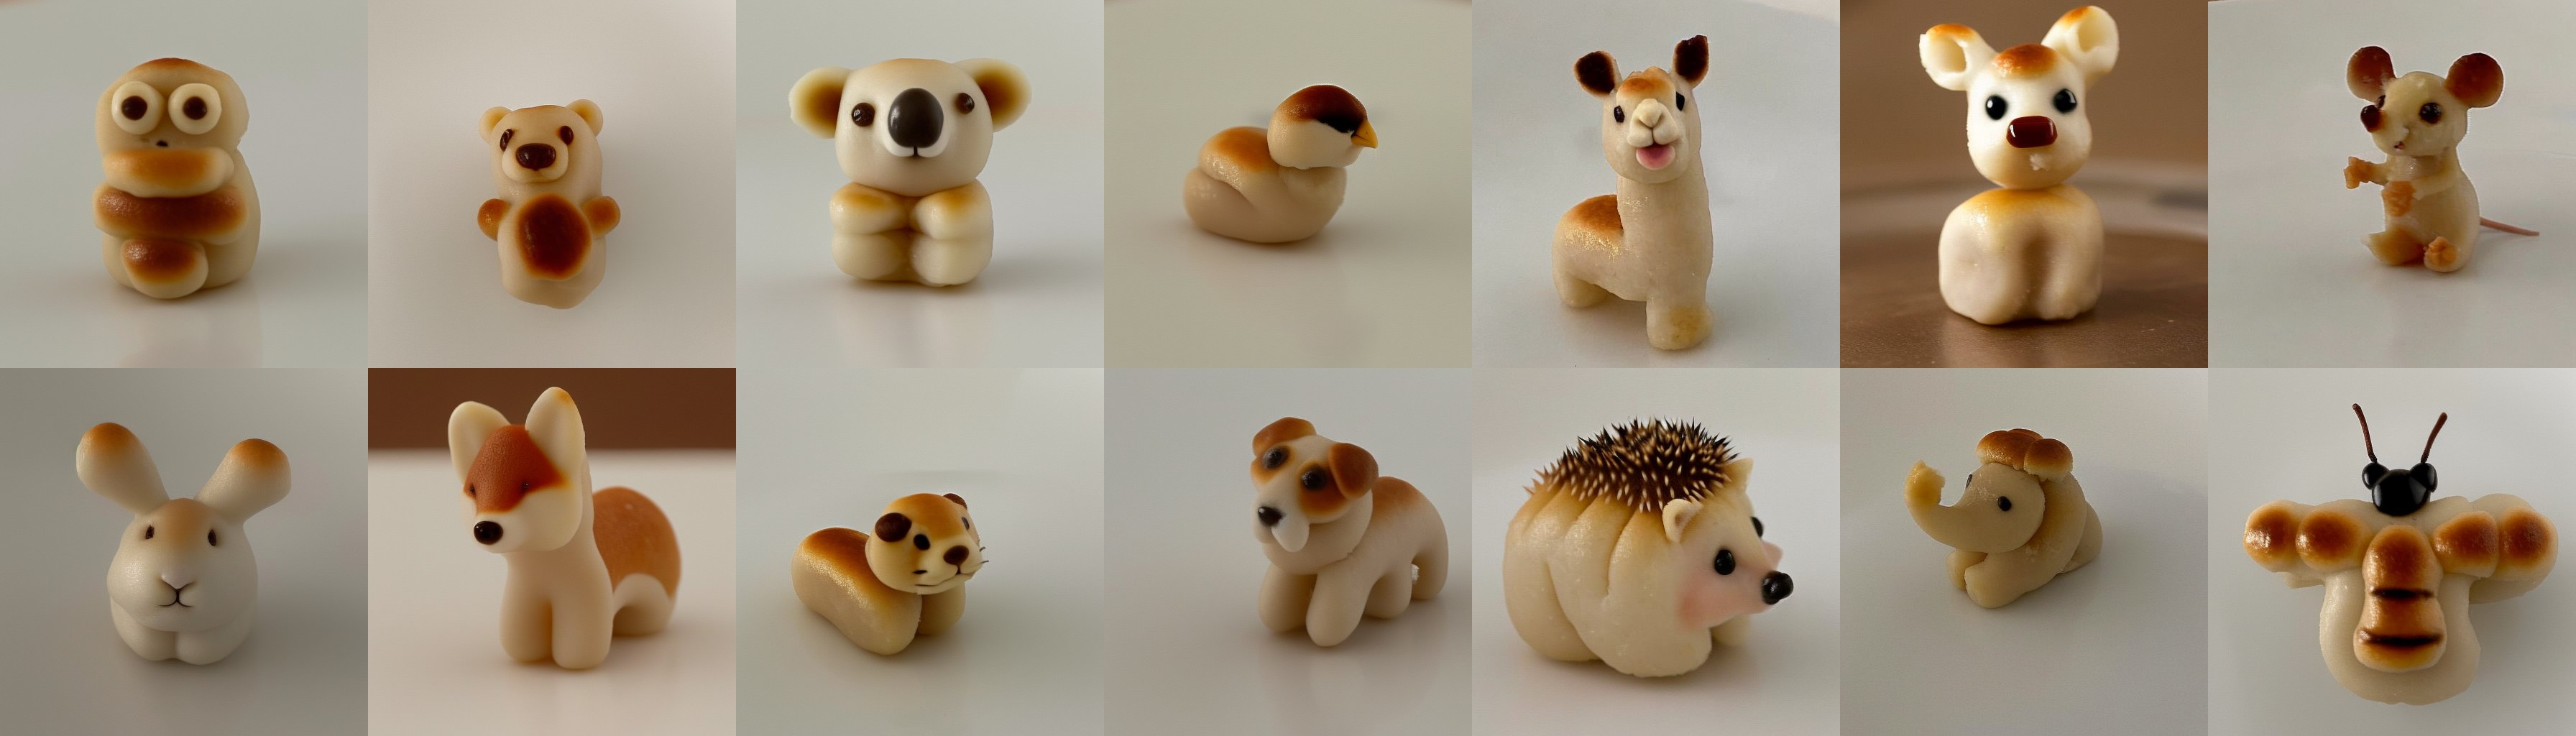

[Model](https://huggingface.co/kokuma/mazapan) · 
[Dataset](https://huggingface.co/datasets/kokuma/figuritas-de-mazapan) · 
[HuggingFace Demo](https://huggingface.co/spaces/kokuma/mazapan)

## Model Setup

In [ ]:
from IPython.display import clear_output
!pip install diffusers==0.10.2 transformers accelerate #scipy ftfy 
clear_output()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
euler_scheduler = EulerDiscreteScheduler.from_config("kokuma/mazapan", subfolder="scheduler")

pipeline = StableDiffusionPipeline.from_pretrained("kokuma/mazapan", scheduler=euler_scheduler)
pipeline.safety_checker = lambda images, **kwargs: (images, False)
pipeline = pipeline.to(device)

clear_output()

## Run the model
Use `mazapan` as the identifier.

Works great with animals, not so good at things or people.

It is useful to include the word `cute`, it helps creating more plausible images.

Be aware that the NSFW filter is removed, as it was returning a lot of false positives.

#### Examples

| Prompt               | Scale | Steps |      Seed |
|:---------------------|------:|------:|----------:|
| A cute bear, mazapan |   7.5 |    20 | 543276510 |
| A cute koala made of mazapan, golden hour | 7 | 25 | 1025256712 |
| A cute monkey made of mazapan | 9.5 | 20 | 876153452 |
| A cute skull, mazapan | 12.5 | 20 | 3076214624 |
| A cute goku, mazapan | 9 | 25 | 3710394870 |
| a cute mazapan husky, mazapan, snowfield | 7.5 | 35 | -2222378460 |

In [ ]:
prompt = "a cute mazapan husky, mazapan, snowfield" #@param {type:"string"}
guidance_scale = 7.5 #@param {type:"slider", min:4, max:20, step:0.5}
steps = 35 #@param {type:"slider", min:10, max:100, step:5}
seed = -2222378460 #@param {type:"number"}

inference_seed = torch.randint(2**32, (1, 1))[0, 0].item() if seed == -1 else seed
print(f"Random seed: {inference_seed}")
generator = torch.Generator(device).manual_seed(inference_seed)

image = pipeline(prompt, guidance_scale=guidance_scale, num_inference_steps=steps, generator=generator).images[0]
image